In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 06:23:28,806] A new study created in memory with name: no-name-e687f72a-4ba5-40d7-a0b5-bdc1bfc8cca1
[I 2025-04-27 06:25:57,863] Trial 0 finished with value: 0.9558219178082192 and parameters: {'n_estimators': 8471, 'learning_rate': 0.008054007541831902, 'num_leaves': 73, 'max_depth': 3, 'min_child_samples': 97, 'subsample': 0.8290470748617444, 'colsample_bytree': 0.6864953629193273, 'reg_alpha': 2.692214528357232e-06, 'reg_lambda': 0.004398582256363751}. Best is trial 0 with value: 0.9558219178082192.
[I 2025-04-27 06:26:31,948] Trial 1 finished with value: 0.9643074581430746 and parameters: {'n_estimators': 779, 'learning_rate': 0.0037982796291189725, 'num_leaves': 29, 'max_depth': 4, 'min_child_samples': 26, 'subsample': 0.8278613754361401, 'colsample_bytree': 0.869080005497246, 'reg_alpha': 0.31984891824547346, 'reg_lambda': 1.844904069039244e-07}. Best is trial 1 with value: 0.9643074581430746.
[I 2025-04-27 06:28:01,676] Trial 2 finished with value: 0.975190258751902

Best trial:
Accuracy: 0.9751902587519025
Best hyperparameters:  {'n_estimators': 3414, 'learning_rate': 0.003263863476921187, 'num_leaves': 22, 'max_depth': 3, 'min_child_samples': 73, 'subsample': 0.6861222164832048, 'colsample_bytree': 0.9832680486932804, 'reg_alpha': 6.152398794434558e-05, 'reg_lambda': 0.0002099749844738528}


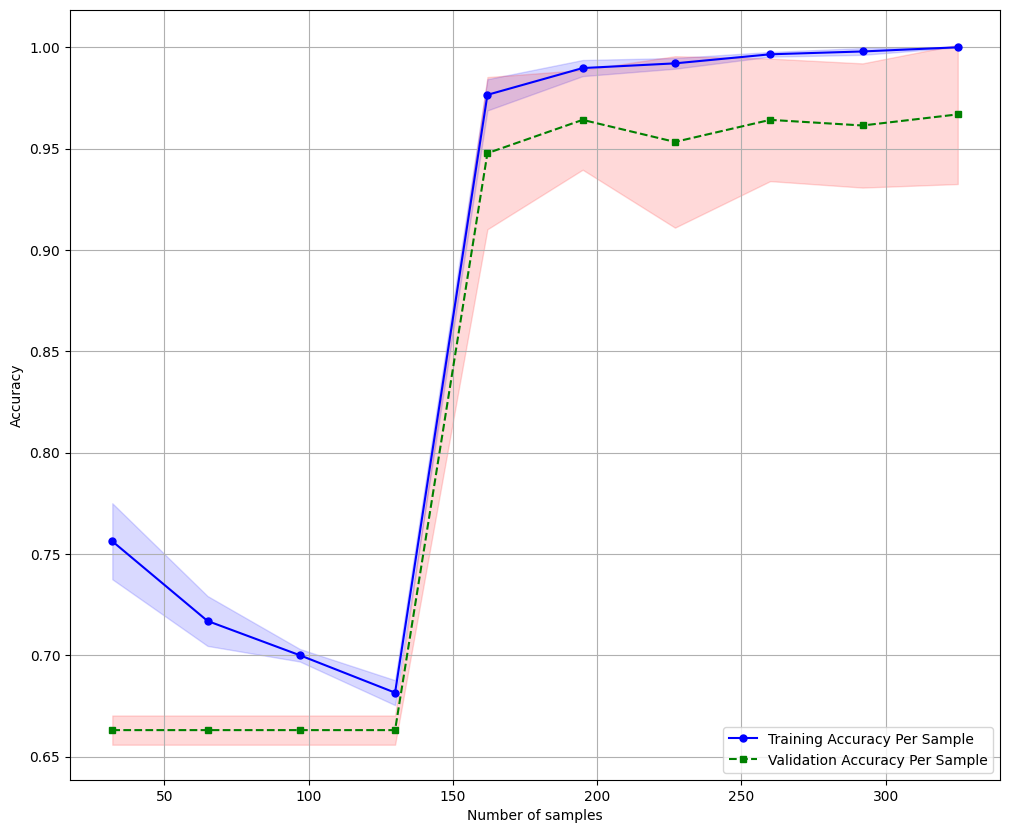

Confusion Matrix
[[ 58   6]
 [  0 107]]
Accuracy: 0.9649, Precision: 0.9469, Recall: 1.0000, F1: 0.9727, AUC: 0.9945


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', outlier_params)

helper.train_and_evaluate_model('lgbm', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)